In [43]:
import numpy as np
import pandas as pd

from wordcloud import WordCloud
from nltk.corpus import stopwords
from collections import Counter 
from nltk.tokenize import word_tokenize

import seaborn as sns
import matplotlib.pyplot as plt

import pandas_profiling as pp
import warnings
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline

### Importing the dataset

In [4]:
main_df = pd.read_csv('stocks_data.csv', encoding="ISO-8859-1")
df = main_df.copy()

In [5]:
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,2000-01-06,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,2000-01-07,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft


### Data Preprocessing

In [14]:
profile = pp.ProfileReport(df)
profile

In [7]:
df.isna().any()

Date     False
Label    False
Top1     False
Top2     False
Top3     False
Top4     False
Top5     False
Top6     False
Top7     False
Top8     False
Top9     False
Top10    False
Top11    False
Top12    False
Top13    False
Top14    False
Top15    False
Top16    False
Top17    False
Top18    False
Top19    False
Top20    False
Top21    False
Top22    False
Top23     True
Top24     True
Top25     True
dtype: bool

Missing values noted in "Top23", "Top24" & "Top25"

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4101 entries, 0 to 4100
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    4101 non-null   object
 1   Label   4101 non-null   int64 
 2   Top1    4101 non-null   object
 3   Top2    4101 non-null   object
 4   Top3    4101 non-null   object
 5   Top4    4101 non-null   object
 6   Top5    4101 non-null   object
 7   Top6    4101 non-null   object
 8   Top7    4101 non-null   object
 9   Top8    4101 non-null   object
 10  Top9    4101 non-null   object
 11  Top10   4101 non-null   object
 12  Top11   4101 non-null   object
 13  Top12   4101 non-null   object
 14  Top13   4101 non-null   object
 15  Top14   4101 non-null   object
 16  Top15   4101 non-null   object
 17  Top16   4101 non-null   object
 18  Top17   4101 non-null   object
 19  Top18   4101 non-null   object
 20  Top19   4101 non-null   object
 21  Top20   4101 non-null   object
 22  Top21   4101 non-null   

In [11]:
# Getting missing values

cols = ['Top23','Top24','Top25']

for i in cols:
    print(f'Number of Missing values in {i}: {df[i].isna().sum()}')

# Dropping missing values

df.dropna(inplace=True)
print('Shape after dropping:',df.shape)

Number of Missing values in Top23: 0
Number of Missing values in Top24: 0
Number of Missing values in Top25: 0
Shape after dropping: (4098, 27)


### Exploring the Data

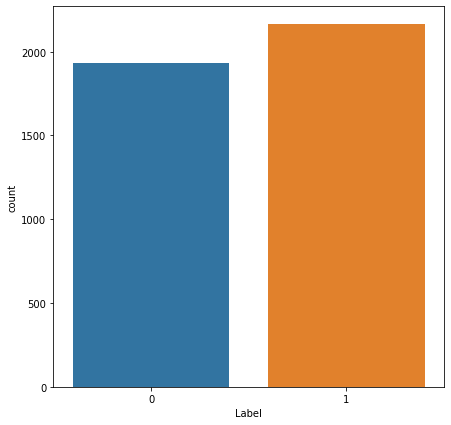

In [17]:
plt.figure(figsize=(7, 7))
sns.countplot(x = 'Label', data=df)
plt.show()

# Class 1- the stock price increased.
# Class 0- the stock price stayed the same or decreased.

In [18]:
# Getting Min and max data present in dataset
df['Date'].min(),  df['Date'].max()

('2000-01-03', '2016-07-01')

In [19]:
# dataset below 01/01/2015 will be considered as training dataset
train = df[df['Date'] < '20150101'] 

# and the rest will be taken as testing dataset
test = df[df['Date'] > '20141231'] 

In [21]:
# Taking data from training set from column 2 to 27, we are actually ignoring here date and class label
data = train.iloc[:, 2:27]


# apart from a-z and A-Z replace everything else with blank space
data.replace("[^a-zA-Z]", " ", regex=True, inplace = True)


# Making column name  as 1, 2, 3,... for simplicity
list1 = [i for i in range(25)]
new_Index = [str(i) for i in list1]
data.columns = new_Index
data.head(3)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,A hindrance to operations extracts from the...,Scorecard,Hughes instant hit buoys Blues,Jack gets his skates on at ice cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,Derby raise a glass to Strupar s debut double,Southgate strikes Leeds pay the penalty,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl s successor drawn into scandal,The difference between men and women,Sara Denver nurse turned solicitor,Diana s landmine crusade put Tories in a panic,Yeltsin s resignation caught opposition flat f...,Russian roulette,Sold out,Recovering a title
1,Scorecard,The best lake scene,Leader German sleaze inquiry,Cheerio boyo,The main recommendations,Has Cubie killed fees,Has Cubie killed fees,Has Cubie killed fees,Hopkins furious at Foster s lack of Hannibal...,Has Cubie killed fees,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man s extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn t know without the ...,Millennium bug fails to bite
2,Coventry caught on counter by Flo,United s rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,McGrath puts India out of their misery,Blair Witch bandwagon rolls on,...,South Melbourne Australia,Necaxa Mexico,Real Madrid Spain,Raja Casablanca Morocco,Corinthians Brazil,Tony s pet project,Al Nassr Saudi Arabia,Ideal Holmes show,Pinochet leaves hospital after tests,Useful links


In [22]:
# Converting headlines to lower case to avoid any misunderstanding by model

for index in new_Index:
    data[index] = data[index].str.lower() 
data.head(2)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,a hindrance to operations extracts from the...,scorecard,hughes instant hit buoys blues,jack gets his skates on at ice cold alex,chaos as maracana builds up for united,depleted leicester prevail as elliott spoils e...,hungry spurs sense rich pickings,gunners so wide of an easy target,derby raise a glass to strupar s debut double,southgate strikes leeds pay the penalty,...,flintoff injury piles on woe for england,hunters threaten jospin with new battle of the...,kohl s successor drawn into scandal,the difference between men and women,sara denver nurse turned solicitor,diana s landmine crusade put tories in a panic,yeltsin s resignation caught opposition flat f...,russian roulette,sold out,recovering a title
1,scorecard,the best lake scene,leader german sleaze inquiry,cheerio boyo,the main recommendations,has cubie killed fees,has cubie killed fees,has cubie killed fees,hopkins furious at foster s lack of hannibal...,has cubie killed fees,...,on the critical list,the timing of their lives,dear doctor,irish court halts ira man s extradition to nor...,burundi peace initiative fades after rebels re...,pe points the way forward to the ecb,campaigners keep up pressure on nazi war crime...,jane ratcliffe,yet more things you wouldn t know without the ...,millennium bug fails to bite


In [36]:
# Joining rows to form paragraphs

headlines = []

for row in range(0, len(data.index)):
    headlines.append(' '.join(str(x) for x in data.iloc[row, 0:25]))

In [47]:
def plot_wordcloud(text):
     
    wordcloud = WordCloud(width = 2000, height = 800, random_state=42, background_color='black', collocations=False, stopwords = stopwords.words('english')).generate(text)
    plt.figure(figsize=(20, 30))

    # Display CloudWord
    plt.imshow(wordcloud) 
    plt.axis("off")
    plt.show()

def plot_countplot(text):

    '''
    Plotting a countplot to see which word is present most frequently
    '''
    
    spt = word_tokenize(text)
    spt1 = [word for word in spt if not word in stopwords.words('english')]

    counter = Counter(spt1)
    freq = counter.most_common(7)

    n_groups = len(freq)
    cnt = [x[1] for x in freq ]
    wrd = [x[0] for x in freq]

    fig, ax = plt.subplots()

    index = np.arange(n_groups)

    rects1 = plt.bar(index, cnt, 0.3,
                     alpha=0.5,
                     color='r',
                     label='word count')


    plt.xlabel(' Word ')
    plt.ylabel('Count')
    plt.title('Most Frequent Word in a Paragraph')
    plt.xticks(index  , wrd)
    plt.legend()

    plt.tight_layout()
    plt.show()

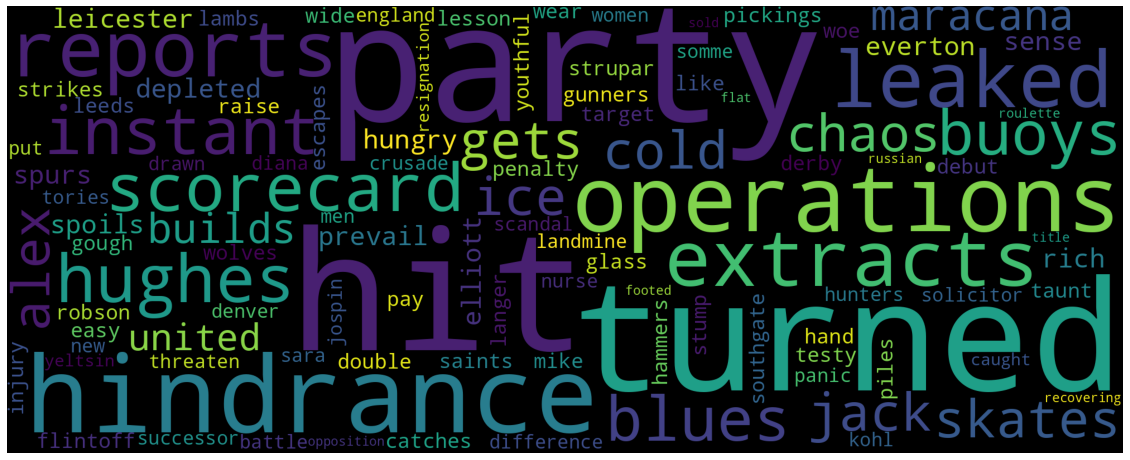

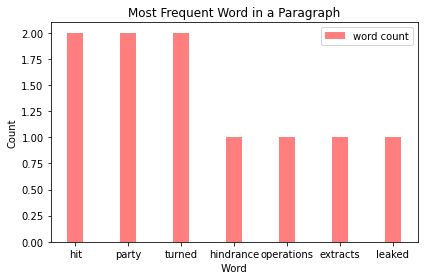

In [51]:
plot_wordcloud(headlines[0])
plot_countplot(headlines[0])

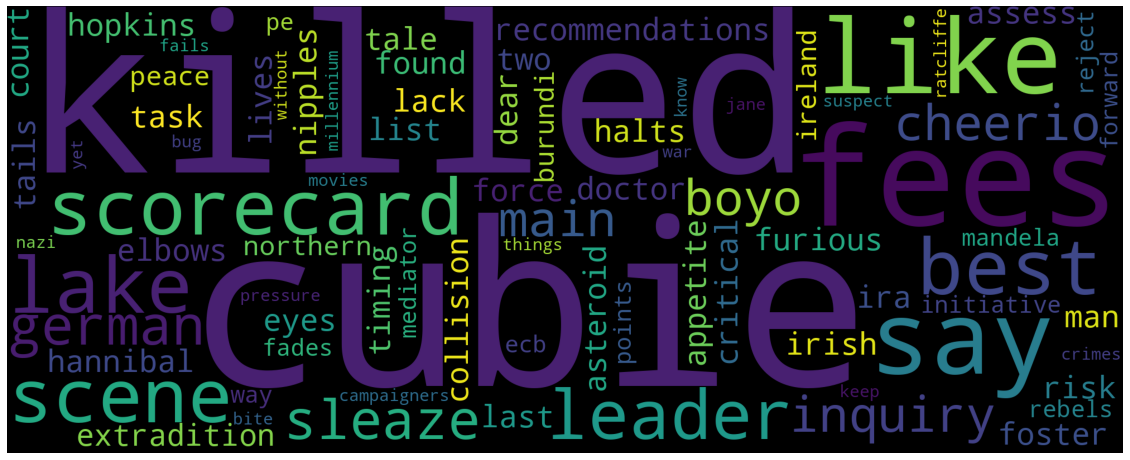

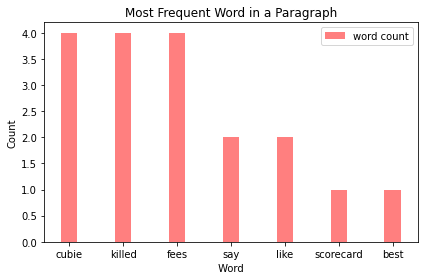

In [52]:
plot_wordcloud(headlines[1])
plot_countplot(headlines[1])